<a href="https://colab.research.google.com/github/DavidS256/Parciales/blob/main/script_parcial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Universidad de los Andes**

HE2 IA aplicada a la econom√≠a

Parcial 3

**Integrantes:**
*   Marcelo Yepes
*   Juan Diego Barrios
*   David Sandino
*   Loek Kleyn


In [1]:
# ‚úÖ Instalaci√≥n de librer√≠as
!pip install -q transformers datasets peft bitsandbytes accelerate gradio


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 76.1/76.1 MB 10.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 54.1/54.1 MB 12.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 323.1/323.1 kB 23.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 95.2/95.2 kB 6.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11.6/11.6 MB 62.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 72.0/72.0 kB 4.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [2]:
# ‚úÖ Importaci√≥n de librer√≠as
import torch
import pandas as pd
from datasets import Dataset
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    TrainingArguments,
    Trainer,
    DataCollatorForLanguageModeling
)
from peft import PromptTuningConfig, get_peft_model, prepare_model_for_kbit_training


In [3]:
import pandas as pd

# Lista de ejemplos
data = [
    {
        "input": "700 mil millones para tren elevado en la costa Caribe",
        "output": "ECONOM√çA: Esta inversi√≥n mejora la conectividad regional, reduce costos log√≠sticos y genera retornos a largo plazo v√≠a aumento de productividad.\nPOL√çTICA: Se promueve la equidad territorial al integrar regiones hist√≥ricamente marginadas. Genera empleo directo en la construcci√≥n.\nCR√çTICA: El costo es elevado para una regi√≥n con baja densidad urbana. Riesgo de elefante blanco si no se garantiza demanda."
    },
    {
        "input": "500 mil millones para subsidios a paneles solares en zonas rurales",
        "output": "ECONOM√çA: Disminuye la dependencia de combustibles f√≥siles, reduce el gasto en energ√≠a y promueve desarrollo econ√≥mico local.\nPOL√çTICA: Empodera comunidades apartadas, mejora calidad de vida y es coherente con compromisos clim√°ticos.\nCR√çTICA: Alta inversi√≥n por hogar beneficiado. Hay dudas sobre mantenimiento y capacitaci√≥n t√©cnica local."
    },
    {
        "input": "300 mil millones para ampliar la jornada escolar completa en colegios p√∫blicos",
        "output": "ECONOM√çA: Mejora el capital humano, eleva la productividad futura y reduce costos sociales como el crimen.\nPOL√çTICA: Contribuye a la equidad educativa. Apoya a madres cabeza de familia al liberar tiempo de cuidado.\nCR√çTICA: Puede ser costoso sin asegurar calidad educativa. Se requiere m√°s que tiempo adicional para mejorar resultados."
    },
    {
        "input": "1 bill√≥n para el metro subterr√°neo de Bogot√°",
        "output": "ECONOM√çA: Genera ahorros en tiempo, reduce congesti√≥n y contaminaci√≥n. Aumenta valorizaci√≥n urbana.\nPOL√çTICA: Es una deuda hist√≥rica con la ciudad. Moderniza la infraestructura nacional.\nCR√çTICA: Riesgo de sobrecostos. Experiencia internacional muestra retrasos. Se compromete capacidad de endeudamiento nacional."
    },
    {
        "input": "250 mil millones para renovar hospitales en la Amazon√≠a",
        "output": "ECONOM√çA: Mejora la eficiencia del sistema de salud y reduce los costos de atenci√≥n tard√≠a o evacuaci√≥n a√©rea.\nPOL√çTICA: Fortalece la presencia estatal en zonas olvidadas. Aumenta legitimidad institucional.\nCR√çTICA: Dif√≠cil supervisi√≥n y riesgos de corrupci√≥n. Posible subutilizaci√≥n por baja densidad poblacional."
    },
    {
        "input": "150 mil millones para crear una universidad p√∫blica en Choc√≥",
        "output": "ECONOM√çA: Genera capital humano local, reduce migraci√≥n de j√≥venes y estimula el desarrollo end√≥geno.\nPOL√çTICA: Apuesta por la justicia racial y territorial. Cierra brechas hist√≥ricas en educaci√≥n superior.\nCR√çTICA: Alto costo por estudiante. Dudas sobre calidad y empleabilidad de egresados."
    },
    {
        "input": "120 mil millones para subsidios de conectividad a internet en zonas rurales",
        "output": "ECONOM√çA: Facilita el acceso a mercados, educaci√≥n y salud digital. Mejora la productividad agr√≠cola e inclusi√≥n financiera.\nPOL√çTICA: Cierra la brecha digital rural-urbana. Fortalece la ciudadan√≠a digital.\nCR√çTICA: Posibles contratos inflados. Sin alfabetizaci√≥n digital, la infraestructura es poco √∫til."
    },
    {
        "input": "900 mil millones para ampliar autopistas en los Llanos Orientales",
        "output": "ECONOM√çA: Mejora exportaci√≥n agr√≠cola y ganadera. Reduce tiempos y costos de transporte.\nPOL√çTICA: Potencia una regi√≥n clave para el desarrollo econ√≥mico del pa√≠s.\nCR√çTICA: Incentiva deforestaci√≥n. Puede beneficiar grandes terratenientes m√°s que peque√±os productores."
    },
    {
        "input": "200 mil millones para un centro de innovaci√≥n tecnol√≥gica en Medell√≠n",
        "output": "ECONOM√çA: Promueve la econom√≠a del conocimiento, genera startups y empleo calificado.\nPOL√çTICA: Fortalece la reputaci√≥n de Medell√≠n como ciudad innovadora.\nCR√çTICA: Concentraci√≥n de recursos en zonas ya desarrolladas. Posible exclusi√≥n de talentos de otras regiones."
    },
    {
        "input": "50 mil millones para campa√±a nacional de reciclaje",
        "output": "ECONOM√çA: Reduce costos de disposici√≥n final de residuos y promueve econom√≠a circular.\nPOL√çTICA: Concientiza a la poblaci√≥n, promueve corresponsabilidad ciudadana.\nCR√çTICA: Bajo impacto si no se acompa√±a de infraestructura adecuada. Puede verse como medida simb√≥lica."
    },
     {
        "input": "800 mil millones para un aeropuerto regional en Boyac√°",
        "output": "ECONOM√çA: Fomenta el turismo y comercio local, mejorando la conectividad y generando ingresos adicionales.\nPOL√çTICA: Desarrollo regional y creaci√≥n de empleos directos e indirectos.\nCR√çTICA: Potencialmente baja demanda, riesgo de convertirse en infraestructura subutilizada."
    },
    {
        "input": "400 mil millones para renovaci√≥n urbana en el centro hist√≥rico de Cartagena",
        "output": "ECONOM√çA: Aumenta el turismo y valoriza propiedades cercanas.\nPOL√çTICA: Revitalizaci√≥n cultural y patrimonial.\nCR√çTICA: Posibles efectos de gentrificaci√≥n y desplazamiento de residentes tradicionales."
    },
    {
        "input": "350 mil millones para becas universitarias para comunidades ind√≠genas",
        "output": "ECONOM√çA: Formaci√≥n de capital humano especializado, impulso a largo plazo en productividad.\nPOL√çTICA: Justicia social, reducci√≥n de brechas hist√≥ricas.\nCR√çTICA: Requiere acompa√±amiento integral para evitar deserci√≥n."
    },
    {
        "input": "100 mil millones para campa√±as de seguridad vial",
        "output": "ECONOM√çA: Reduce accidentes y gastos en salud p√∫blica.\nPOL√çTICA: Mejora la percepci√≥n ciudadana sobre seguridad p√∫blica.\nCR√çTICA: Puede ser inefectivo sin infraestructura vial adecuada."
    },
    {
        "input": "600 mil millones para construcci√≥n de viviendas sociales en Cali",
        "output": "ECONOM√çA: Impulsa construcci√≥n y empleo local, mejora calidad de vida.\nPOL√çTICA: Combate la pobreza y d√©ficit habitacional.\nCR√çTICA: Riesgo de corrupci√≥n en adjudicaci√≥n de contratos."
    },
    {
        "input": "450 mil millones para digitalizaci√≥n del archivo nacional",
        "output": "ECONOM√çA: Acceso eficiente a informaci√≥n hist√≥rica y reducci√≥n de costos operativos.\nPOL√çTICA: Transparencia gubernamental y preservaci√≥n cultural.\nCR√çTICA: Alto costo inicial, posibles retrasos por fallos t√©cnicos."
    },
    {
        "input": "80 mil millones para parques infantiles en municipios peque√±os",
        "output": "ECONOM√çA: Promueve turismo local y peque√±os negocios cercanos.\nPOL√çTICA: Espacios seguros de recreaci√≥n infantil.\nCR√çTICA: Bajo impacto econ√≥mico real, prioridad discutible frente a otras necesidades."
    },
    {
        "input": "2 billones para renovaci√≥n del sistema ferroviario nacional",
        "output": "ECONOM√çA: Eficiencia log√≠stica, reducci√≥n de costos de transporte.\nPOL√çTICA: Integraci√≥n territorial y reducci√≥n de emisiones.\nCR√çTICA: Alt√≠simos costos iniciales, dudas sobre rentabilidad y sostenibilidad."
    },
    {
        "input": "300 mil millones para subsidios al transporte p√∫blico en Bogot√°",
        "output": "ECONOM√çA: Reduce costos para usuarios, fomenta uso de transporte p√∫blico.\nPOL√çTICA: Equidad y accesibilidad urbana.\nCR√çTICA: Sostenibilidad fiscal dudosa, dependencia permanente de subsidios."
    },
    {
        "input": "100 mil millones para restauraci√≥n ecol√≥gica en p√°ramos",
        "output": "ECONOM√çA: Protege fuentes h√≠dricas vitales para sectores econ√≥micos clave.\nPOL√çTICA: Compromiso ambiental y mitigaci√≥n del cambio clim√°tico.\nCR√çTICA: Dificultad para medir resultados concretos a corto plazo."
    },
    {
        "input": "550 mil millones para hospitales m√≥viles para zonas rurales",
        "output": "ECONOM√çA: Reduce costos por atenci√≥n m√©dica tard√≠a, eficiencia operativa.\nPOL√çTICA: Mejora cobertura y acceso a salud rural.\nCR√çTICA: Alto costo de mantenimiento, riesgo de subutilizaci√≥n."
    },
    {
        "input": "180 mil millones para promoci√≥n internacional del turismo colombiano",
        "output": "ECONOM√çA: Incremento de divisas, desarrollo econ√≥mico regional.\nPOL√çTICA: Mejora imagen pa√≠s, impulsa diplomacia cultural.\nCR√çTICA: Posibles resultados limitados sin seguridad ni infraestructura tur√≠stica adecuada."
    },
    {
        "input": "50 mil millones para formaci√≥n tecnol√≥gica de docentes",
        "output": "ECONOM√çA: Mejora calidad educativa, productividad futura.\nPOL√çTICA: Modernizaci√≥n del sector educativo.\nCR√çTICA: Requiere seguimiento continuo para asegurar impacto real."
    },
    {
        "input": "220 mil millones para ampliar cobertura de agua potable en La Guajira",
        "output": "ECONOM√çA: Reduce costos sociales, mejora condiciones de salud p√∫blica.\nPOL√çTICA: Justicia social, cumplimiento de derechos humanos b√°sicos.\nCR√çTICA: Riesgos log√≠sticos y corrupci√≥n en zonas dif√≠ciles."
    },
    {
        "input": "700 mil millones para puentes viales en Antioquia",
        "output": "ECONOM√çA: Reduce tiempos y costos de transporte, aumenta comercio regional.\nPOL√çTICA: Conectividad y desarrollo regional equilibrado.\nCR√çTICA: Riesgo ambiental en zonas de alta biodiversidad."
    },
    {
        "input": "90 mil millones para sistemas de monitoreo s√≠smico nacional",
        "output": "ECONOM√çA: Previene p√©rdidas millonarias por desastres.\nPOL√çTICA: Seguridad ciudadana, reducci√≥n de riesgos.\nCR√çTICA: Alto costo relativo frente a otros m√©todos de prevenci√≥n."
    },
    {
        "input": "270 mil millones para impulsar producci√≥n cinematogr√°fica nacional",
        "output": "ECONOM√çA: Genera empleo en industria creativa, ingresos por exportaciones culturales.\nPOL√çTICA: Preservaci√≥n cultural y posicionamiento internacional.\nCR√çTICA: Beneficio limitado para sectores econ√≥micos clave."
    },
    {
        "input": "130 mil millones para renovaci√≥n tecnol√≥gica en colegios p√∫blicos",
        "output": "ECONOM√çA: Incrementa competencias digitales, productividad futura.\nPOL√çTICA: Equidad educativa, modernizaci√≥n tecnol√≥gica.\nCR√çTICA: Obsolescencia r√°pida, mantenimiento costoso."
    },
    {
        "input": "60 mil millones para museos regionales de historia natural",
        "output": "ECONOM√çA: Turismo educativo y cultural, desarrollo local.\nPOL√çTICA: Preservaci√≥n de patrimonio natural.\nCR√çTICA: Bajo retorno econ√≥mico, potencial baja afluencia."
    },
    {
        "input": "750 mil millones para ampliaci√≥n de puertos mar√≠timos",
        "output": "ECONOM√çA: Incrementa capacidad exportadora, reduce costos log√≠sticos.\nPOL√çTICA: Fortalecimiento del comercio internacional.\nCR√çTICA: Riesgo ambiental y conflictos territoriales potenciales."
    },
    {
        "input": "600 mil millones para construir plantas de tratamiento de aguas residuales",
        "output": "ECONOM√çA: Mejora la salud p√∫blica, reduciendo gastos sanitarios y aumentando la productividad laboral.\nPOL√çTICA: Refuerza el compromiso con el medio ambiente y los ODS.\nCR√çTICA: Costos operativos elevados, riesgos de subutilizaci√≥n si no hay mantenimiento continuo."
    },
    {
        "input": "200 mil millones para fortalecer escuelas rurales con bibliotecas digitales",
        "output": "ECONOM√çA: Cierre de brechas educativas que afecta el desarrollo econ√≥mico rural.\nPOL√çTICA: Promueve la equidad territorial y el acceso a oportunidades.\nCR√çTICA: Puede no tener impacto si no se acompa√±a de conectividad y formaci√≥n docente."
    },
    {
        "input": "1 bill√≥n para duplicar la capacidad de la Refiner√≠a de Cartagena",
        "output": "ECONOM√çA: Aumenta la producci√≥n energ√©tica y reduce importaciones de combustibles.\nPOL√çTICA: Soberan√≠a energ√©tica y fortalecimiento del sector estrat√©gico.\nCR√çTICA: Contradice metas de descarbonizaci√≥n, riesgo ambiental en zona costera."
    },
    {
        "input": "150 mil millones para desarrollar software educativo p√∫blico",
        "output": "ECONOM√çA: Reducci√≥n de costos en licencias privadas y fortalecimiento del sector tecnol√≥gico.\nPOL√çTICA: Democratiza el acceso a la tecnolog√≠a educativa.\nCR√çTICA: Requiere alta calidad y soporte t√©cnico continuo para ser efectivo."
    },
    {
        "input": "75 mil millones para construir centros deportivos municipales",
        "output": "ECONOM√çA: Estimula empleo en construcci√≥n y turismo local por eventos deportivos.\nPOL√çTICA: Fomenta salud y cohesi√≥n social.\nCR√çTICA: Pueden volverse elefantes blancos si no hay programas de uso continuo."
    },
    {
        "input": "90 mil millones para modernizar estaciones meteorol√≥gicas",
        "output": "ECONOM√çA: Mejora predicci√≥n clim√°tica y planificaci√≥n agr√≠cola.\nPOL√çTICA: Refuerza gesti√≥n del riesgo y cumplimiento ambiental.\nCR√çTICA: Poco visible para la ciudadan√≠a, dif√≠cil de justificar pol√≠ticamente."
    },
    {
        "input": "400 mil millones para crear un sistema nacional de trenes de carga",
        "output": "ECONOM√çA: Reduce costos log√≠sticos, descongestiona carreteras y mejora competitividad.\nPOL√çTICA: Fortalece integraci√≥n interregional y sostenibilidad del transporte.\nCR√çTICA: Alt√≠simo costo inicial y riesgo de corrupci√≥n en contratos de infraestructura."
    },
    {
        "input": "130 mil millones para un fondo de apoyo a artistas y creadores independientes",
        "output": "ECONOM√çA: Impulsa econom√≠a creativa y genera empleos no tradicionales.\nPOL√çTICA: Visibiliza expresiones culturales marginadas y fortalece identidad nacional.\nCR√çTICA: Dificultad para medir impacto econ√≥mico y riesgo de politizaci√≥n en asignaciones."
    },
    {
        "input": "250 mil millones para un fondo de innovaci√≥n en energ√≠as limpias",
        "output": "ECONOM√çA: Atrae inversi√≥n privada y acelera la transici√≥n energ√©tica.\nPOL√çTICA: Cumple compromisos clim√°ticos y posiciona al pa√≠s como l√≠der verde.\nCR√çTICA: Alta incertidumbre tecnol√≥gica, resultados a largo plazo."
    },
    {
        "input": "180 mil millones para fortalecer el sistema carcelario",
        "output": "ECONOM√çA: Mejora eficiencia en justicia penal y reduce reincidencia a mediano plazo.\nPOL√çTICA: Responde a demandas de seguridad ciudadana.\nCR√çTICA: Puede percibirse como priorizar castigo sobre prevenci√≥n social."
    },
    {
        "input": "60 mil millones para formaci√≥n en habilidades digitales para adultos mayores",
        "output": "ECONOM√çA: Mejora inclusi√≥n financiera y acceso a servicios p√∫blicos digitales.\nPOL√çTICA: Favorece la equidad intergeneracional y el envejecimiento activo.\nCR√çTICA: Bajo impacto econ√≥mico directo, dif√≠cil de escalar sin acompa√±amiento personalizado."
    },
    {
        "input": "900 mil millones para nuevo centro internacional de convenciones en Medell√≠n",
        "output": "ECONOM√çA: Aumenta turismo de negocios, genera empleo formal y dinamiza sectores hoteleros.\nPOL√çTICA: Posiciona a Medell√≠n como capital de eventos regional.\nCR√çTICA: Posible saturaci√≥n de infraestructura, desplazamiento de recursos desde necesidades b√°sicas."
    },
    {
        "input": "500 mil millones para dotaci√≥n tecnol√≥gica del Ej√©rcito Nacional",
        "output": "ECONOM√çA: Estimula industria de defensa, transferencia tecnol√≥gica y empleo especializado.\nPOL√çTICA: Refuerza control territorial y seguridad nacional.\nCR√çTICA: Cuestionamientos √©ticos, uso indebido y opacidad en compras militares."
    },
    {
        "input": "210 mil millones para programa de alfabetizaci√≥n ambiental en colegios",
        "output": "ECONOM√çA: Forma ciudadanos m√°s responsables con recursos naturales.\nPOL√çTICA: Inversi√≥n educativa alineada con sostenibilidad.\nCR√çTICA: Resultados intangibles, dif√≠cil medici√≥n de impacto."
    },
    {
        "input": "300 mil millones para renovaci√≥n de cableados el√©ctricos en zonas urbanas",
        "output": "ECONOM√çA: Reduce p√©rdidas t√©cnicas, mejora eficiencia energ√©tica y confiabilidad del sistema.\nPOL√çTICA: Mejora la percepci√≥n de calidad del servicio p√∫blico.\nCR√çTICA: Alta inversi√≥n poco visible para usuarios finales."
    },
    {
        "input": "170 mil millones para digitalizaci√≥n de la justicia civil",
        "output": "ECONOM√çA: Reduce costos procesales y mejora tiempos judiciales.\nPOL√çTICA: Refuerza acceso a justicia y transparencia institucional.\nCR√çTICA: Brecha digital puede excluir a los m√°s vulnerables del sistema."
    },
    {
        "input": "140 mil millones para estrategia nacional de salud mental",
        "output": "ECONOM√çA: Reduce p√©rdida de productividad y gastos hospitalarios cr√≥nicos.\nPOL√çTICA: Aumenta el bienestar general, reduce violencia y exclusi√≥n.\nCR√çTICA: Requiere personal altamente capacitado y sostenibilidad presupuestal."
    },
    {
        "input": "220 mil millones para programa nacional de compostaje urbano",
        "output": "ECONOM√çA: Disminuye presi√≥n sobre rellenos sanitarios y crea cadenas de valor ambiental.\nPOL√çTICA: Educaci√≥n ciudadana y cambio de h√°bitos ecol√≥gicos.\nCR√çTICA: Baja adopci√≥n sin incentivos directos, requiere fuerte pedagog√≠a."
    },
    {
        "input": "320 mil millones para un sistema unificado de transporte metropolitano",
        "output": "ECONOM√çA: Disminuye duplicidades operativas y mejora eficiencia del servicio.\nPOL√çTICA: Integra regiones, mejora movilidad urbana.\nCR√çTICA: Alta complejidad pol√≠tica y t√©cnica en su implementaci√≥n."
    },
    {
        "input": "95 mil millones para programa nacional de voluntariado joven",
        "output": "ECONOM√çA: Experiencia laboral temprana, promueve participaci√≥n social activa.\nPOL√çTICA: Construcci√≥n de ciudadan√≠a, prevenci√≥n de violencia juvenil.\nCR√çTICA: Dificultad para medir impacto, riesgo de baja participaci√≥n sin incentivos."
    },
    {
        "input": "350 mil millones para fortalecer centros de salud mental comunitarios",
        "output": "ECONOM√çA: Mejora el acceso temprano a tratamientos, reduce costos hospitalarios cr√≥nicos y mejora la productividad laboral.\nPOL√çTICA: Responde a una necesidad creciente pospandemia, promueve bienestar colectivo y reduce estigmas.\nCR√çTICA: Requiere personal capacitado y continuidad presupuestal para sostenibilidad."
    },
    {
        "input": "200 mil millones para impulsar energ√≠as mareomotrices en el Pac√≠fico colombiano",
        "output": "ECONOM√çA: Aprovecha un recurso natural poco explotado, diversifica la matriz energ√©tica y genera innovaci√≥n.\nPOL√çTICA: Posiciona a Colombia como l√≠der en transici√≥n energ√©tica en la regi√≥n.\nCR√çTICA: Tecnolog√≠a incipiente, altos costos iniciales y falta de infraestructura complementaria."
    },
    {
        "input": "150 mil millones para traducci√≥n digital de patrimonio cultural ind√≠gena",
        "output": "ECONOM√çA: Impulsa la econom√≠a creativa local y genera oportunidades para comunidades marginadas.\nPOL√çTICA: Preserva lenguas y tradiciones en riesgo de desaparici√≥n, fomenta inclusi√≥n cultural.\nCR√çTICA: Impacto econ√≥mico incierto, requiere procesos participativos sensibles."
    },
    {
        "input": "800 mil millones para cableado subterr√°neo de redes el√©ctricas en zonas urbanas",
        "output": "ECONOM√çA: Disminuye p√©rdidas t√©cnicas, mejora continuidad del servicio y reduce costos por mantenimiento.\nPOL√çTICA: Moderniza infraestructura urbana, refuerza imagen de ciudades sostenibles.\nCR√çTICA: Inversi√≥n elevada, obras pueden generar molestias temporales a la ciudadan√≠a."
    },
    {
        "input": "500 mil millones para expansi√≥n del transporte fluvial en la Amazon√≠a",
        "output": "ECONOM√çA: Reduce costos log√≠sticos en regiones de dif√≠cil acceso, mejora eficiencia del comercio regional.\nPOL√çTICA: Fortalece integraci√≥n territorial y mejora acceso a servicios esenciales.\nCR√çTICA: Riesgo de impactos ambientales si no se regula adecuadamente el tr√°fico fluvial."
    },
    {
        "input": "520 mil millones para centros de innovaci√≥n rural y tecnolog√≠a agr√≠cola",
        "output": "ECONOM√çA: Reduce costos operativos a largo plazo.\nPOL√çTICA: Promueve inclusi√≥n social y territorial.\nCR√çTICA: Alto costo inicial y dependencia tecnol√≥gica."
    },
    {
        "input": "180 mil millones para ampliar cobertura de jardines infantiles en zonas rurales",
        "output": "ECONOM√çA: Fortalece la competitividad regional.\nPOL√çTICA: Refuerza pol√≠ticas p√∫blicas de desarrollo sostenible.\nCR√çTICA: Puede generar desigualdades si no se distribuye equitativamente."
    },
    {
        "input": "1 bill√≥n para automatizar el catastro nacional",
        "output": "ECONOM√çA: Aumenta el acceso equitativo a recursos econ√≥micos.\nPOL√çTICA: Refuerza pol√≠ticas p√∫blicas de desarrollo sostenible.\nCR√çTICA: Riesgo de baja adopci√≥n si no hay pedagog√≠a adecuada."
    },
    {
        "input": "2.5 billones para centros de innovaci√≥n rural y tecnolog√≠a agr√≠cola",
        "output": "ECONOM√çA: Aumenta el acceso equitativo a recursos econ√≥micos.\nPOL√çTICA: Fortalece la presencia estatal en regiones estrat√©gicas.\nCR√çTICA: Puede generar desigualdades si no se distribuye equitativamente."
    },
    {
        "input": "75 mil millones para centros de innovaci√≥n rural y tecnolog√≠a agr√≠cola",
        "output": "ECONOM√çA: Reduce costos operativos a largo plazo.\nPOL√çTICA: Promueve inclusi√≥n social y territorial.\nCR√çTICA: Alto costo inicial y dependencia tecnol√≥gica."
    },
    {
        "input": "75 mil millones para capacitar mujeres en tecnolog√≠as verdes",
        "output": "ECONOM√çA: Mejora la productividad y genera nuevos empleos.\nPOL√çTICA: Responde a compromisos del gobierno con sectores vulnerables.\nCR√çTICA: Alto costo inicial y dependencia tecnol√≥gica."
    },
    {
        "input": "1 bill√≥n para creaci√≥n de observatorios regionales de cambio clim√°tico",
        "output": "ECONOM√çA: Aumenta el acceso equitativo a recursos econ√≥micos.\nPOL√çTICA: Aumenta la legitimidad institucional.\nCR√çTICA: Resultados intangibles dif√≠ciles de medir a corto plazo."
    },
    {
        "input": "250 mil millones para automatizar el catastro nacional",
        "output": "ECONOM√çA: Impulsa la eficiencia de servicios p√∫blicos.\nPOL√çTICA: Fortalece la presencia estatal en regiones estrat√©gicas.\nCR√çTICA: Alto costo inicial y dependencia tecnol√≥gica."
    },
    {
        "input": "400 mil millones para ampliar cobertura de jardines infantiles en zonas rurales",
        "output": "ECONOM√çA: Reduce costos operativos a largo plazo.\nPOL√çTICA: Refuerza pol√≠ticas p√∫blicas de desarrollo sostenible.\nCR√çTICA: Riesgo de baja adopci√≥n si no hay pedagog√≠a adecuada."
    },
    {
        "input": "300 mil millones para creaci√≥n de observatorios regionales de cambio clim√°tico",
        "output": "ECONOM√çA: Aumenta el acceso equitativo a recursos econ√≥micos.\nPOL√çTICA: Responde a compromisos del gobierno con sectores vulnerables.\nCR√çTICA: Puede generar desigualdades si no se distribuye equitativamente."
    },
    {
        "input": "1 bill√≥n para automatizar el catastro nacional",
        "output": "ECONOM√çA: Mejora la productividad y genera nuevos empleos.\nPOL√çTICA: Fortalece la presencia estatal en regiones estrat√©gicas.\nCR√çTICA: Resultados intangibles dif√≠ciles de medir a corto plazo."
    },
    {
        "input": "650 mil millones para centros de innovaci√≥n rural y tecnolog√≠a agr√≠cola",
        "output": "ECONOM√çA: Impulsa la eficiencia de servicios p√∫blicos.\nPOL√çTICA: Promueve inclusi√≥n social y territorial.\nCR√çTICA: Resultados intangibles dif√≠ciles de medir a corto plazo."
    },
    {
        "input": "1.2 billones para incentivos a industrias de reutilizaci√≥n de residuos",
        "output": "ECONOM√çA: Reduce costos operativos a largo plazo.\nPOL√çTICA: Aumenta la legitimidad institucional.\nCR√çTICA: Resultados intangibles dif√≠ciles de medir a corto plazo."
    },
    {
        "input": "600 mil millones para automatizar el catastro nacional",
        "output": "ECONOM√çA: Fortalece la competitividad regional.\nPOL√çTICA: Promueve inclusi√≥n social y territorial.\nCR√çTICA: Puede generar desigualdades si no se distribuye equitativamente."
    },
    {
        "input": "520 mil millones para automatizar el catastro nacional",
        "output": "ECONOM√çA: Aumenta el acceso equitativo a recursos econ√≥micos.\nPOL√çTICA: Responde a compromisos del gobierno con sectores vulnerables.\nCR√çTICA: Riesgo de baja adopci√≥n si no hay pedagog√≠a adecuada."
    },
    {
        "input": "520 mil millones para digitalizar registros m√©dicos en hospitales p√∫blicos",
        "output": "ECONOM√çA: Mejora la productividad y genera nuevos empleos.\nPOL√çTICA: Fortalece la presencia estatal en regiones estrat√©gicas.\nCR√çTICA: Resultados intangibles dif√≠ciles de medir a corto plazo."
    },
    {
        "input": "75 mil millones para implementar bibliotecas m√≥viles en municipios dispersos",
        "output": "ECONOM√çA: Reduce costos operativos a largo plazo.\nPOL√çTICA: Refuerza pol√≠ticas p√∫blicas de desarrollo sostenible.\nCR√çTICA: Riesgo de baja adopci√≥n si no hay pedagog√≠a adecuada."
    },
    {
        "input": "90 mil millones para centros de innovaci√≥n rural y tecnolog√≠a agr√≠cola",
        "output": "ECONOM√çA: Fortalece la competitividad regional.\nPOL√çTICA: Aumenta la legitimidad institucional.\nCR√çTICA: Riesgo de baja adopci√≥n si no hay pedagog√≠a adecuada."
    },
    {
        "input": "120 mil millones para digitalizar registros m√©dicos en hospitales p√∫blicos",
        "output": "ECONOM√çA: Reduce costos operativos a largo plazo.\nPOL√çTICA: Fortalece la presencia estatal en regiones estrat√©gicas.\nCR√çTICA: Resultados intangibles dif√≠ciles de medir a corto plazo."
    },
    {
        "input": "1 bill√≥n para centros de innovaci√≥n rural y tecnolog√≠a agr√≠cola",
        "output": "ECONOM√çA: Reduce costos operativos a largo plazo.\nPOL√çTICA: Fortalece la presencia estatal en regiones estrat√©gicas.\nCR√çTICA: Riesgo de baja adopci√≥n si no hay pedagog√≠a adecuada."
    },
    {
        "input": "300 mil millones para implementar bibliotecas m√≥viles en municipios dispersos",
        "output": "ECONOM√çA: Fortalece la competitividad regional.\nPOL√çTICA: Fortalece la presencia estatal en regiones estrat√©gicas.\nCR√çTICA: Riesgo de baja adopci√≥n si no hay pedagog√≠a adecuada."
    },
    {
        "input": "600 mil millones para digitalizar registros m√©dicos en hospitales p√∫blicos",
        "output": "ECONOM√çA: Aumenta el acceso equitativo a recursos econ√≥micos.\nPOL√çTICA: Promueve inclusi√≥n social y territorial.\nCR√çTICA: Riesgo de baja adopci√≥n si no hay pedagog√≠a adecuada."
    },
    {
        "input": "650 mil millones para centros de innovaci√≥n rural y tecnolog√≠a agr√≠cola",
        "output": "ECONOM√çA: Fortalece la competitividad regional.\nPOL√çTICA: Promueve inclusi√≥n social y territorial.\nCR√çTICA: Resultados intangibles dif√≠ciles de medir a corto plazo."
    },
    {
        "input": "1.2 billones para centros de innovaci√≥n rural y tecnolog√≠a agr√≠cola",
        "output": "ECONOM√çA: Aumenta el acceso equitativo a recursos econ√≥micos.\nPOL√çTICA: Promueve inclusi√≥n social y territorial.\nCR√çTICA: Dificultad de seguimiento en zonas aisladas."
    },
    {
        "input": "1 bill√≥n para automatizar el catastro nacional",
        "output": "ECONOM√çA: Aumenta el acceso equitativo a recursos econ√≥micos.\nPOL√çTICA: Refuerza pol√≠ticas p√∫blicas de desarrollo sostenible.\nCR√çTICA: Riesgo de baja adopci√≥n si no hay pedagog√≠a adecuada."
    }

]

# Crear DataFrame
df = pd.DataFrame(data)

# Guardar como CSV
df.to_csv("gasto_justificado.csv", index=False)

print("‚úÖ Archivo 'gasto_justificado.csv' creado correctamente.")


‚úÖ Archivo 'gasto_justificado.csv' creado correctamente.


In [4]:
# ‚úÖ Cargar el dataset desde CSV
df = pd.read_csv("gasto_justificado.csv")
dataset = Dataset.from_pandas(df)
print(f"üìä Dataset cargado con {len(dataset)} ejemplos")


üìä Dataset cargado con 80 ejemplos


In [5]:
# ‚úÖ Tokenizador y Prompt Tuning (system prompt)
model_name = "microsoft/phi-2"
tokenizer = AutoTokenizer.from_pretrained(model_name)

if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

system_prompt = "Eres un asesor experto. Justifica partidas de gasto en t√©rminos econ√≥micos, pol√≠ticos y cr√≠ticos."


tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

In [6]:
# ‚úÖ Preprocesamiento que concatena input + output (entrenamiento supervisado)
def preprocess_function(examples):
    prompts = []
    for i in range(len(examples["input"])):
        prompt = f"<s>{examples['input'][i]}\n\n{examples['output'][i]}</s>"
        prompts.append(prompt)

    tokenized_inputs = tokenizer(
        prompts,
        truncation=True,
        max_length=512,
        padding="max_length",
        return_tensors="pt"
    )
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].clone()
    return tokenized_inputs

tokenized_dataset = dataset.map(
    preprocess_function,
    batched=True,
    remove_columns=dataset.column_names
)


Map:   0%|          | 0/80 [00:00<?, ? examples/s]

In [7]:
# ‚úÖ Carga del modelo y configuraci√≥n de Prompt Tuning con texto inicial
bnb_config = BitsAndBytesConfig(
    load_in_8bit=True,
    bnb_8bit_use_double_quant=True,
    bnb_8bit_quant_type="nf4",
    bnb_8bit_compute_dtype=torch.float16
)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map="auto"
)

model = prepare_model_for_kbit_training(model)

peft_config = PromptTuningConfig(
    task_type="CAUSAL_LM",
    num_virtual_tokens=10,
    tokenizer_name_or_path=model_name,
    prompt_tuning_init="TEXT",
    prompt_tuning_init_text=system_prompt
)

model = get_peft_model(model, peft_config)
model.print_trainable_parameters()


config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

trainable params: 25,600 || all params: 2,779,709,440 || trainable%: 0.0009


Map:   0%|          | 0/80 [00:00<?, ? examples/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


üöÄ Entrenando modelo...


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


‚úÖ Entrenamiento finalizado.


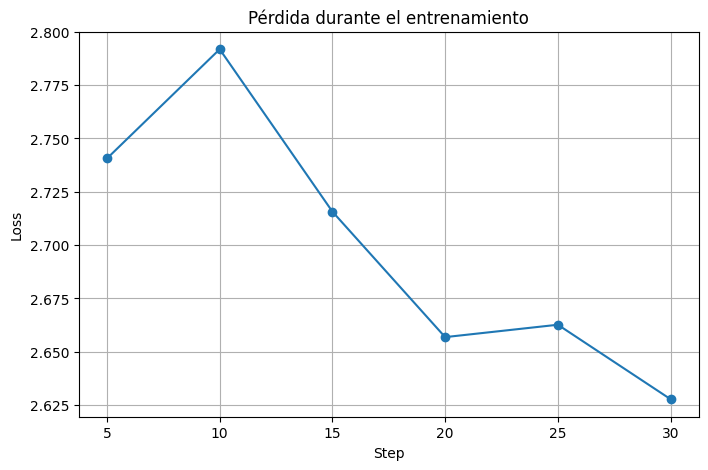

In [8]:
from transformers import TrainingArguments, Trainer, TrainerCallback
from transformers import DataCollatorForLanguageModeling
import matplotlib.pyplot as plt

# ====== AJUSTE DE DATASET PARA TRAINER ======
# Convertimos expl√≠citamente las labels a listas simples para que Trainer las detecte correctamente.
def format_labels(example):
    example["labels"] = example["input_ids"]
    return example

tokenized_dataset = tokenized_dataset.map(format_labels)

# ====== CONFIGURACI√ìN DEL ENTRENAMIENTO ======
training_args = TrainingArguments(
    output_dir="./resultados_justificador_phi2",
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4,
    num_train_epochs=3,
    warmup_steps=10,
    learning_rate=2e-4,
    fp16=True,
    logging_steps=5,
    save_steps=20,
    save_total_limit=1,
    report_to="none"
)

# Callback personalizado para graficar la p√©rdida
class LossCallback(TrainerCallback):
    def __init__(self):
        self.losses = []
        self.steps = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs and "loss" in logs:
            self.losses.append(logs["loss"])
            self.steps.append(state.global_step)

    def plot_loss(self):
        plt.figure(figsize=(8,5))
        plt.plot(self.steps, self.losses, marker='o')
        plt.title("P√©rdida durante el entrenamiento")
        plt.xlabel("Step")
        plt.ylabel("Loss")
        plt.grid()
        plt.show()

# Instanciamos el callback
loss_callback = LossCallback()

# Collator para lenguaje causal (no enmascarado)
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

# Trainer (SIN usar label_names para evitar error)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    data_collator=data_collator,
    callbacks=[loss_callback]
)

# Entrenamos el modelo
print("üöÄ Entrenando modelo...")
trainer.train()
print("‚úÖ Entrenamiento finalizado.")

# Graficamos la p√©rdida
loss_callback.plot_loss()




In [9]:
# ‚úÖ Inferencia: Solo con el input, el modelo debe generar la justificaci√≥n
def infer(text):
    prompt = f"<s>{text}\n\n"
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=200,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.8
    )
    print(tokenizer.decode(outputs[0], skip_special_tokens=True))

# Ejemplo:
infer("700 mil millones para tren elevado en la costa Caribe")


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.11/dist-packages/peft/peft_model.py:1926: UserWarning: Position ids are not supported for parameter efficient tuning. Ignoring position ids.
  warnings.warn("Position ids are not supported for parameter efficient tuning. Ignoring position ids.")
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/usr/local/lib/pyth

<s>700 mil millones para tren elevado en la costa Caribe





In [10]:
# Crear carpeta para guardar el modelo
output_dir = "./modelo_justificador_phi2"

# Guardar modelo fine-tuneado (LoRA)
print("üíæ Guardando modelo y tokenizador adaptados con LoRA...")
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

print(f"‚úÖ Modelo y tokenizador guardados exitosamente en: {output_dir}")

üíæ Guardando modelo y tokenizador adaptados con LoRA...
‚úÖ Modelo y tokenizador guardados exitosamente en: ./modelo_justificador_phi2


In [11]:
import gradio as gr
import torch

# Cargar el modelo entrenado y el tokenizador desde disco
output_dir = "./modelo_justificador_phi2"
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel

print("üì¶ Cargando modelo y tokenizador entrenados...")
tokenizer = AutoTokenizer.from_pretrained(output_dir)
base_model = AutoModelForCausalLM.from_pretrained("microsoft/phi-2", device_map="auto", torch_dtype=torch.float16)
model = PeftModel.from_pretrained(base_model, output_dir)

# Funci√≥n de generaci√≥n
def generar_justificacion(texto, max_length=400):
    if not texto.strip():
        return "Por favor ingresa una partida de gasto p√∫blico."

    prompt = f"<s>Genera una justificaci√≥n para la siguiente partida de gasto:\n\n{texto}\n\nECONOM√çA:\n"
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

    with torch.no_grad():
        outputs = model.generate(
            input_ids=inputs.input_ids,
            attention_mask=inputs.attention_mask,
            max_length=max_length,
            temperature=0.7,
            top_p=0.9,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id
        )

    generado = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generado.replace(prompt, "").strip()

# Crear la interfaz Gradio
demo = gr.Interface(
    fn=generar_justificacion,
    inputs=gr.Textbox(label="Partida de gasto p√∫blico", placeholder="Ejemplo: 700 mil millones para tren elevado en la costa Caribe"),
    outputs=gr.Textbox(label="Justificaci√≥n generada"),
    title="üß† Generador de Justificaciones de Gasto P√∫blico",
    description="Introduce una partida de gasto y obt√©n una justificaci√≥n econ√≥mica, una narrativa pol√≠tica y una cr√≠tica de oposici√≥n.",
    examples=[
        ["700 mil millones para tren elevado en la costa Caribe"],
        ["350 mil millones para becas universitarias para comunidades ind√≠genas"],
        ["100 mil millones para restauraci√≥n ecol√≥gica en p√°ramos"],
        ["2 billones para renovaci√≥n del sistema ferroviario nacional"]
    ],
    theme=gr.themes.Soft()
)

# Lanzar la app
demo.launch(share=True)  # share=True te da un link p√∫blico




üì¶ Cargando modelo y tokenizador entrenados...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0003d7e0a1b1c2a22c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
